In [1]:
# Import Necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [4]:
# load data
df = pd.read_csv(r'../dataset/google_stock_dataset.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [6]:
df.shape

(4431, 7)

In [7]:
# Set Date as index (optional)
df.set_index('Date', inplace=True)

In [8]:
#chech if there is null values
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='Date'>

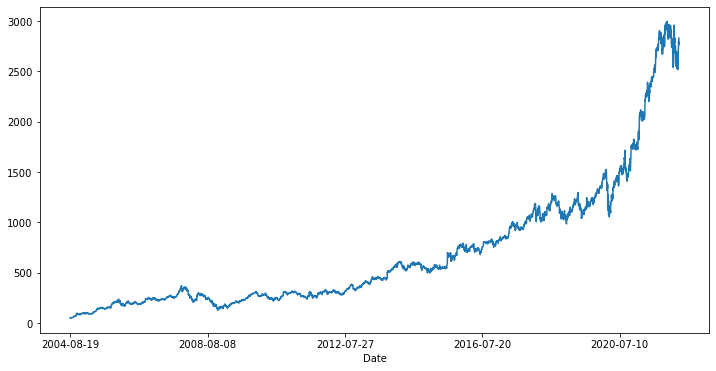

In [9]:
# Lets plot the target 'Close'
df['Close'].plot(figsize=(12,6))

In [10]:
# Define features (X) and target (y)
# X = df[["Open"]]
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, y_train.shape

((3544, 4), (3544,))

In [13]:
# Initialize the Linear Regression model
model = LinearRegression()

In [14]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Print model coeficients
model.coef_

array([-5.88690726e-01,  7.63530831e-01,  8.26182032e-01,  7.62514374e-09])

In [16]:
# Print model Intercept
model.intercept_

-0.06029516537432755

In [17]:
# Make predictions
y_pred = model.predict(X_test)
#y_pred

In [18]:
# Lets print actual and predicted price togother
_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
_df

,Actual,Predicted
Date,,
2014-10-01,579.630005,581.562636
2007-12-21,348.693695,348.276732
2020-11-03,1645.660034,1638.532345
2008-06-18,281.471466,282.317326
2005-11-21,204.884888,201.868453
...,...,...
2018-10-18,1097.910034,1096.835458
2015-05-14,549.200012,547.630743
2008-10-07,173.178177,176.219917


In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Model Evaluation:
Mean Squared Error (MSE): 36.45955590489223
Mean Absolute Error (MAE): 3.1288504001003488
R-squared (R2): 0.9999193186840375


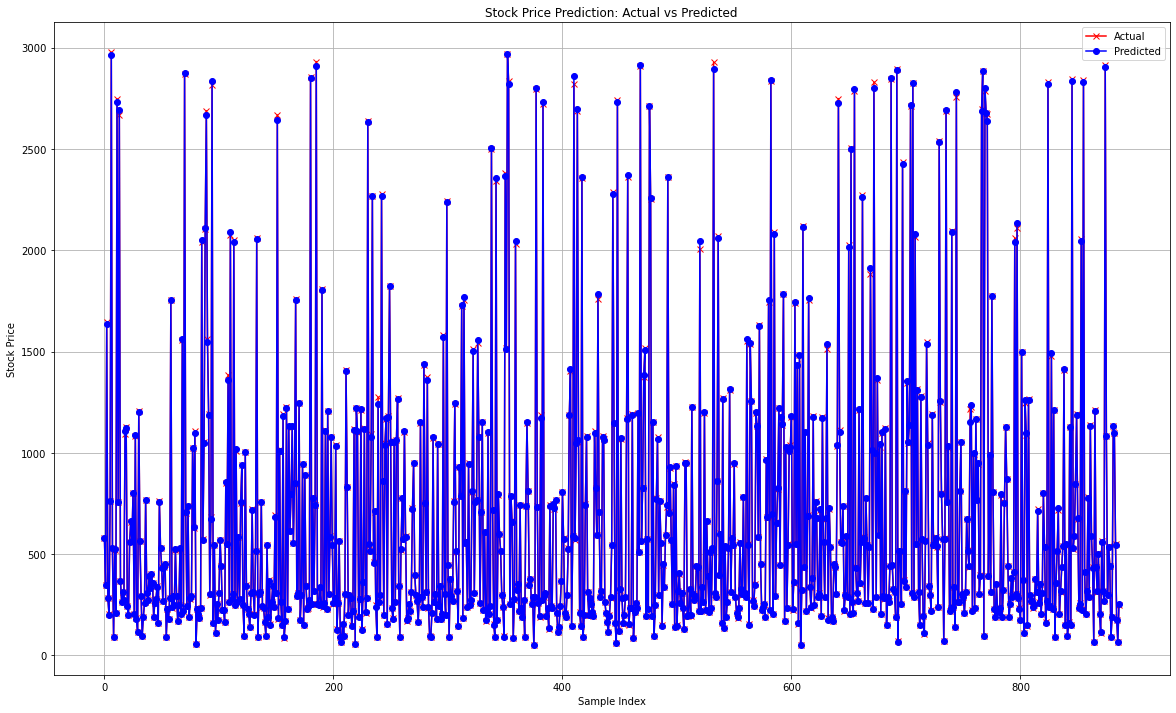

In [20]:
# Plot the predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(y_test.values, label="Actual", marker='x', color='red')
plt.plot(y_pred, label="Predicted", marker='o', color='blue')
plt.title("Stock Price Prediction: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

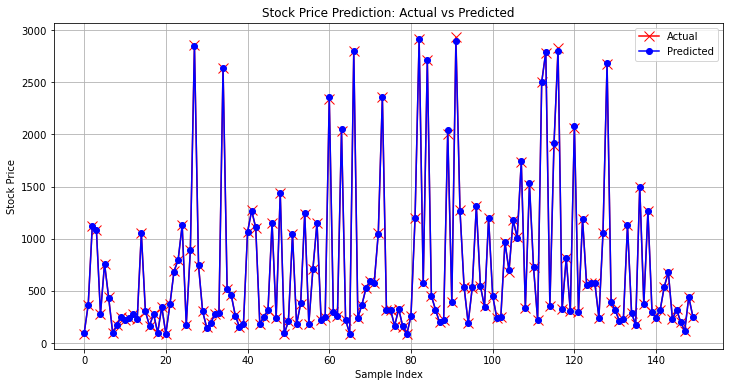

In [22]:
# Enhance the plot vision by taking data samples.

num_samples = 150

# Generate random indices without replacement
random_indices = np.random.choice(len(y_test.values), size=num_samples, replace=False)

# Take samples from both arrays using the same indices
test_sample = y_test.values[random_indices]
predicted_sample = y_pred[random_indices]

# Sort the samples by the random indices (optional for better visualization)
sorted_indices = np.argsort(random_indices)
test_sample = test_sample[sorted_indices]
predicted_sample = predicted_sample[sorted_indices]

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_sample, label="Actual", marker='x', color='red', ms=10)
plt.plot(predicted_sample, label="Predicted", marker='o', color='blue')
plt.title("Stock Price Prediction: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()